In [3]:

import os
from supabase import create_client, Client
from dotenv import load_dotenv

load_dotenv()

url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)


In [4]:
response = supabase.table("color_test_results").select("*").execute()

In [7]:
import pandas as pd

df = pd.DataFrame(response.data)

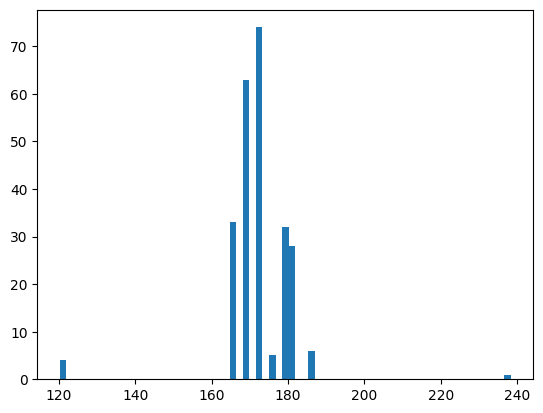

In [30]:
import matplotlib.pyplot as plt

counts, bins, _ = plt.hist(df.final_hue, bins=69)

In [108]:
import numpy as np

xy = df.final_hue.value_counts().sort_index().reset_index()
final_hue_raw = xy["final_hue"].values
raw_count = xy["count"].values
raw_count = raw_count / raw_count.sum()

count = np.cumsum(raw_count) / raw_count.sum()
count = np.stack((np.concatenate(([0.0], count[:-1])), count), axis=1)
final_hue = np.stack((final_hue_raw, final_hue_raw), axis=1)
#count = np.concatenate(([0.0], count))
#final_hue, count

#final_hue, count
count = count.ravel()
final_hue = final_hue.ravel()

count, final_hue

(array([0.        , 0.01626016, 0.01626016, 0.1504065 , 0.1504065 ,
        0.40650407, 0.40650407, 0.70731707, 0.70731707, 0.72764228,
        0.72764228, 0.85772358, 0.85772358, 0.97154472, 0.97154472,
        0.99593496, 0.99593496, 1.        ]),
 array([120.2795058 , 120.2795058 , 165.59200279, 165.59200279,
        168.69176962, 168.69176962, 172.52329215, 172.52329215,
        176.35481468, 176.35481468, 178.72282582, 178.72282582,
        181.82259266, 181.82259266, 185.65411519, 185.65411519,
        238.3281573 , 238.3281573 ]))

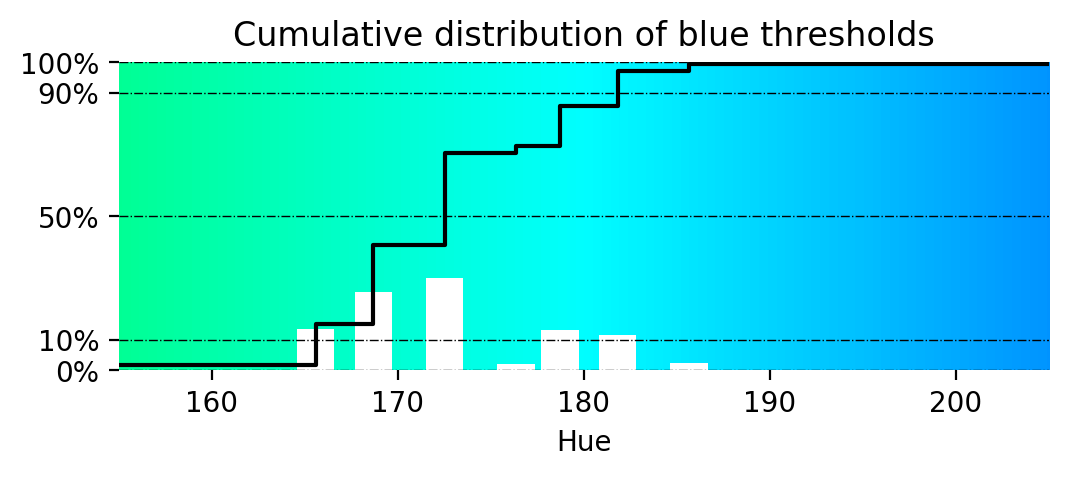

In [119]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from colorsys import hls_to_rgb

from colorsys import hls_to_rgb

data = []
for i in range(120, 241):
    data.append(hls_to_rgb(i / 360, .5, 1))  # HSL(120, 100, 50)
cmap = LinearSegmentedColormap.from_list("custom", data)

# Create gradient background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect='auto', extent=[120, 240, 0, 1], cmap=cmap)

plt.bar(final_hue_raw, raw_count, color='white', alpha=1, width=2)
plt.plot(final_hue, count, '-', color='black')

plt.xlim((155, 205))
plt.xlabel("Hue")
plt.yticks([0, .1, .5, .9, 1], ["0%", "10%", "50%", "90%", "100%"])
plt.box(False)
plt.title("Cumulative distribution of blue thresholds")

plt.grid(True, axis='y', color='black', linestyle='-.', linewidth=0.5)

In [101]:
#2**6


64